# Nave Bayes Binary Text classification
Naive Bayes is a powerful machine learning algorithm used for binary text classification. It works by calculating the probability of a given text belonging to each class, and then assigns the text to the class with the highest probability. Naive Bayes is simple, fast, and effective, and has been used extensively for text classification tasks. It is particularly useful for classifying large volumes of text due to its speed and accuracy. Naive Bayes is a great choice for binary text classification, as it is able to quickly and accurately classify texts into two categories.

By:
<h3><a href='https://www.linkedin.com/in/sirqasim/'>Muhammad Qasim</a></h3>

[Source Kaggle](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data)
### classes
* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

In [1]:
import pandas as pd
import numpy as np
import re
import time

In [2]:

df1 = pd.read_feather("https://github.com/EnggQasim/PGD_Batch2_Machine_Learning/blob/main/class14_nlp_navey_bayes_text_classification/data.feather?raw=true")
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Phrase      16278 non-null  object
 1   Sentiment   16278 non-null  int64 
 2   input_data  16278 non-null  object
dtypes: int64(1), object(2)
memory usage: 381.6+ KB


,Phrase,Sentiment,input_data
0,would have a hard time sitting through this one,0,"['would, hard, time, sit, one, ']"
1,have a hard time sitting through this one,0,"['have, hard, time, sit, one, ']"
2,Aggressive self-glorification and a manipulati...,0,"['aggressive, self, clarification, manipulativ..."
3,self-glorification and a manipulative whitewash,0,"['self, clarification, manipulative, whitewash..."
4,Trouble Every Day is a plodding mess .,0,"['trouble, every, day, pad, mess, ., ']"


# Now chang 4 to 1 Positive
# 0 to 0 Negative


In [4]:
df1.Sentiment = df1.Sentiment.map({4:1,
                                  0:0})
df1.Sentiment.value_counts(dropna=False)

1    9206
0    7072
Name: Sentiment, dtype: int64

In [5]:
df1.input_data.values[0]

array(["'would", 'hard', 'time', 'sit', 'one', "'"], dtype=object)

In [6]:
df1['input_data1'] = df1.input_data.apply(lambda x:" ".join(x))
df1.head()

,Phrase,Sentiment,input_data,input_data1
0,would have a hard time sitting through this one,0,"['would, hard, time, sit, one, ']",'would hard time sit one '
1,have a hard time sitting through this one,0,"['have, hard, time, sit, one, ']",'have hard time sit one '
2,Aggressive self-glorification and a manipulati...,0,"['aggressive, self, clarification, manipulativ...",'aggressive self clarification manipulative wh...
3,self-glorification and a manipulative whitewash,0,"['self, clarification, manipulative, whitewash...",'self clarification manipulative whitewash '
4,Trouble Every Day is a plodding mess .,0,"['trouble, every, day, pad, mess, ., ']",'trouble every day pad mess . '


In [7]:
df1.Sentiment.value_counts(normalize=True)*100

1    56.554859
0    43.445141
Name: Sentiment, dtype: float64

In [8]:
print("Boths classes Number of samples:\t\t\n",(df1.Sentiment.value_counts(normalize=True)*100))
print()
print("Boths classes ratio:\t\t\t\n",(df1.Sentiment.value_counts(normalize=True)*100)*10/100)
print()
print("Boths classes 20% sample count\n",(df1.Sentiment.value_counts())*20/100)

Boths classes Number of samples:		
 1    56.554859
0    43.445141
Name: Sentiment, dtype: float64

Boths classes ratio:			
 1    5.655486
0    4.344514
Name: Sentiment, dtype: float64

Boths classes 20% sample count
 1    1841.2
0    1414.4
Name: Sentiment, dtype: float64


In [9]:
test = pd.concat([df1[df1.Sentiment==1].sample(1841),
                    df1[df1.Sentiment==0].sample(1414)])[["input_data1","Sentiment"]]
print(len(test))
display(test.head(1))

train = df1.loc[~df1.index.isin(test.index.values)][["input_data1","Sentiment"]]
print(len(train))
display(train.head(1))

3255


,input_data1,Sentiment
15830,'masterful calibrate ',1


13023


,input_data1,Sentiment
0,'would hard time sit one ',0


In [10]:
X = df1[["input_data1"]]# all Data for corpus

print(X.head())


                                         input_data1
0                         'would hard time sit one '
1                          'have hard time sit one '
2  'aggressive self clarification manipulative wh...
3       'self clarification manipulative whitewash '
4                    'trouble every day pad mess . '


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = X.input_data1.values
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)

# encode document
# vector = vectorizer.transform(text)

{'would': 8436, 'hard': 3468, 'time': 7667, 'sit': 6864, 'one': 5239, 'have': 3501, 'aggressive': 260, 'self': 6651, 'clarification': 1320, 'manipulative': 4602, 'whitewash': 8327, 'trouble': 7823, 'every': 2621, 'day': 1852, 'pad': 5375, 'mess': 4759, 'is': 4071, 'padding': 5376, 'could': 1664, 'hate': 3496, 'reason': 6080, 'oedekerk': 5208, 'realization': 6076, 'childhood': 1261, 'dream': 2274, 'martial': 4646, 'arts': 504, 'flick': 2969, 'prove': 5907, 'sometimes': 7000, 'youth': 8484, 'remain': 6188, 'baseball': 687, 'movies': 4947, 'try': 7834, 'mythic': 4995, 'hampered': 3444, 'paralyze': 5416, 'insurgent': 3981, 'script': 6607, 'aim': 272, 'poetry': 5679, 'end': 2475, 'sound': 7029, 'like': 4401, 'satire': 6524, 'little': 4443, 'sense': 6666, 'go': 3273, 'avoid': 602, 'almost': 314, 'feel': 2852, 'movie': 4940, 'interest': 4001, 'entertain': 2526, 'amuse': 361, 'us': 8052, 'progression': 5877, 'ramble': 6019, 'coherence': 1401, 'give': 3247, 'new': 5083, 'mean': 4697, 'phrase': 

In [12]:
train_x = vectorizer.transform(train.input_data1.values).toarray()
train_y = train.Sentiment.values
test_x = vectorizer.transform(test.input_data1.values).toarray()
test_y = test.Sentiment.values
print(len(train_x),len(train_y))
print(len(test_x),len(test_y))

13023 13023
3255 3255


# Train Vavie Bayes ML algorithm

In [13]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_x,train_y)

BernoulliNB()

# Test Data

In [14]:
y_predict = clf.predict(test_x)
y_predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_y,y_predict)
cm

array([[1259,  155],
       [  90, 1751]], dtype=int64)

<img src='https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png'>

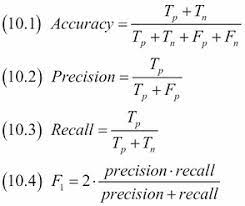

In [16]:
accuracy_score(test_y, y_predict)

0.9247311827956989

In [17]:
cm

array([[1259,  155],
       [  90, 1751]], dtype=int64)

In [18]:
tp = cm[0][0]; print(tp)
tn = cm[1][1]; print(tn)
fp = cm[0][1]; print(fp)
fn = cm[1][0]; print(fn)

1259
1751
155
90


In [19]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.9247311827956989


In [23]:
from sklearn.metrics import precision_score
precision_score(test_y, y_predict)

0.9186778593913956

In [24]:
from sklearn.metrics import recall_score
recall_score(test_y, y_predict)

0.951113525258012

In [25]:
from sklearn.metrics import f1_score
f1_score(test_y, y_predict)

0.9346143581531892